importing library

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

loading dataset


In [5]:
data= pd.read_csv('titanic_train.csv')

In [6]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


bar plot of binary variables

In [14]:
def bar_plot(variable):
    #get feature
    var = data[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
   
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

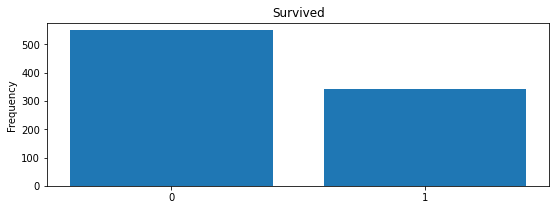

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


In [15]:
category1 = ["Survived"]
for c in category1:
    bar_plot(c)

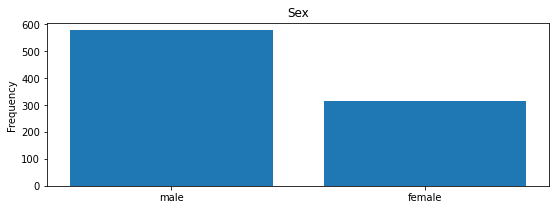

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


In [18]:
category2 =["Sex"]
for c in category2:
    bar_plot(c)

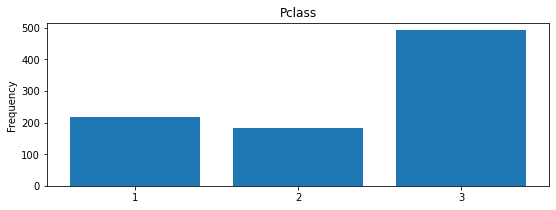

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


In [19]:
category3 = ["Pclass"] 
for c in category3:
    bar_plot(c)

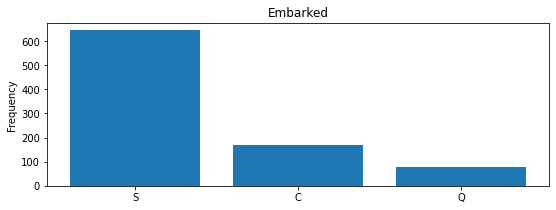

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [20]:
category4 = [ "Embarked"]
for c in category4:
    bar_plot(c)

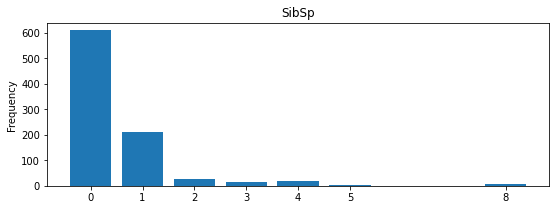

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [21]:
category5 = ["SibSp"]
for c in category5:
    bar_plot(c)

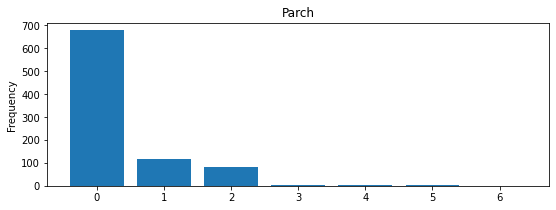

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [22]:
category6 = ["Parch"]
for c in category6:
    bar_plot(c)

histogram plot

In [23]:
def plot_hist(variable):
    plt.figure(figsize =(9,3))
    plt.hist(data[variable], bins =50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

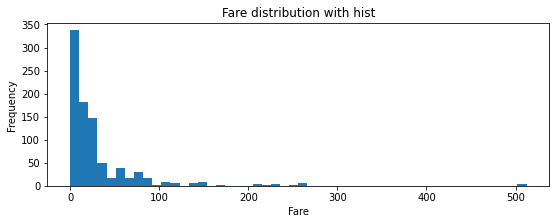

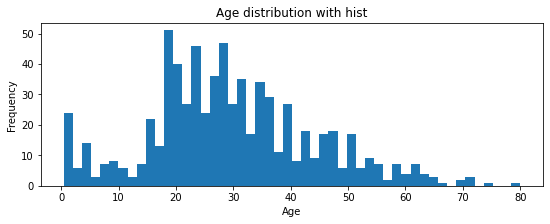

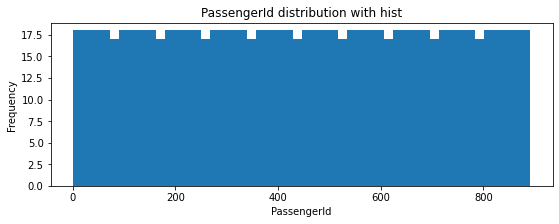

In [24]:
numericVar = ["Fare", "Age", "PassengerId"]
for n in numericVar:
    plot_hist(n)


class comparision and relation

In [25]:
#Pclass vs Survived
data[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [27]:
#Sex vs Survived
data[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [28]:
#SibSp vs Survived
data[["SibSp", "Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [29]:
#Fare vs Survived
data[["Fare", "Survived"]].groupby(["Fare"], as_index = False).mean().sort_values(by = "Survived", ascending = False)


,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
83,12.6500,1.0
81,12.4750,1.0
79,12.2875,1.0
194,56.9292,1.0
77,12.0000,1.0


In [30]:
#Pclass vs Survived
data[["Embarked", "Survived"]].groupby(["Embarked"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


outlier detection

In [31]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quantile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # Detect outliers and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [35]:
data.loc[detect_outliers(data,["Age","SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [37]:
#drop outliers 
data = data.drop(detect_outliers(data,["Age","SibSp", "Parch", "Fare"]))

In [45]:
data_len = len(data) 
#data = pd.concat([data,data], axis = 0).reset_index(drop = True)

In [46]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
data.columns[data.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [48]:
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             340
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1360
Embarked          4
dtype: int64

In [50]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN
941,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
1702,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


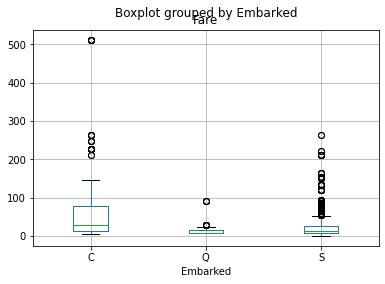

In [51]:
data.boxplot(column = "Fare", by ="Embarked")
plt.show()

In [52]:
data["Embarked"] = data["Embarked"].fillna("C")
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [53]:
data[data["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [54]:
data["Fare"] = data["Fare"].fillna(np.mean(data[data["Pclass"] == 3]["Fare"]))

In [55]:
data[data["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


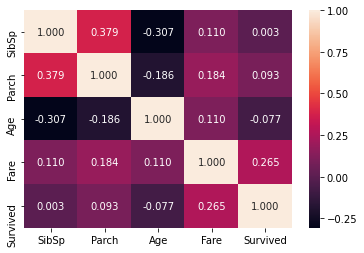

In [57]:
list1=["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(data[list1].corr(), annot=True, fmt =".3f")
plt.show()

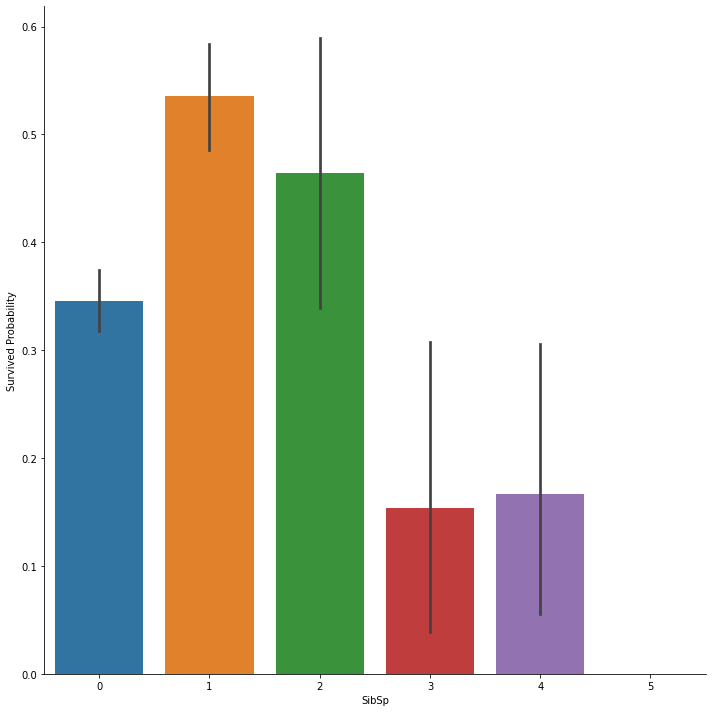

In [72]:
gr = sns.factorplot(x="SibSp", y="Survived", data=data, kind="bar", size =10)
gr.set_ylabels("Survived Probability")
plt.show()

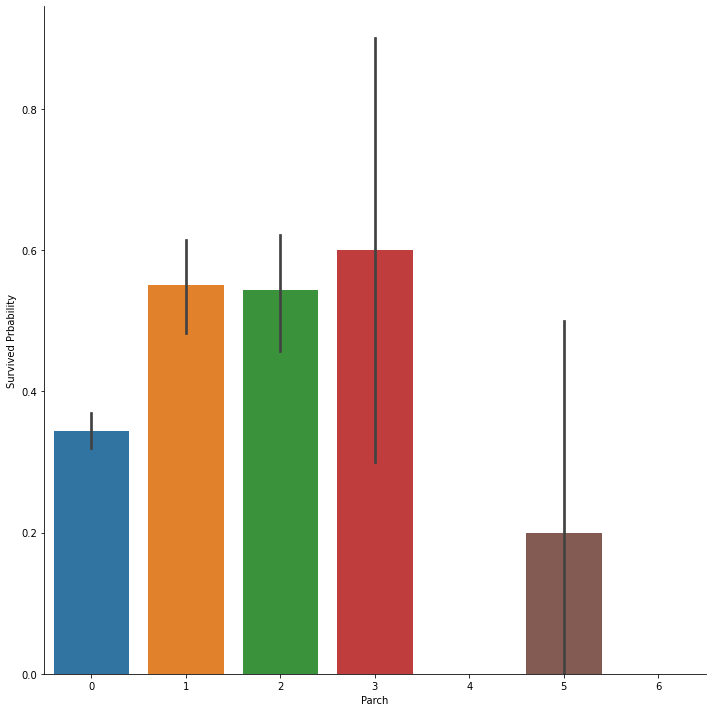

In [73]:
gr = sns.factorplot(x="Parch", y="Survived", kind="bar", data=data, size=10)
gr.set_ylabels("Survived Prbability")
plt.show()

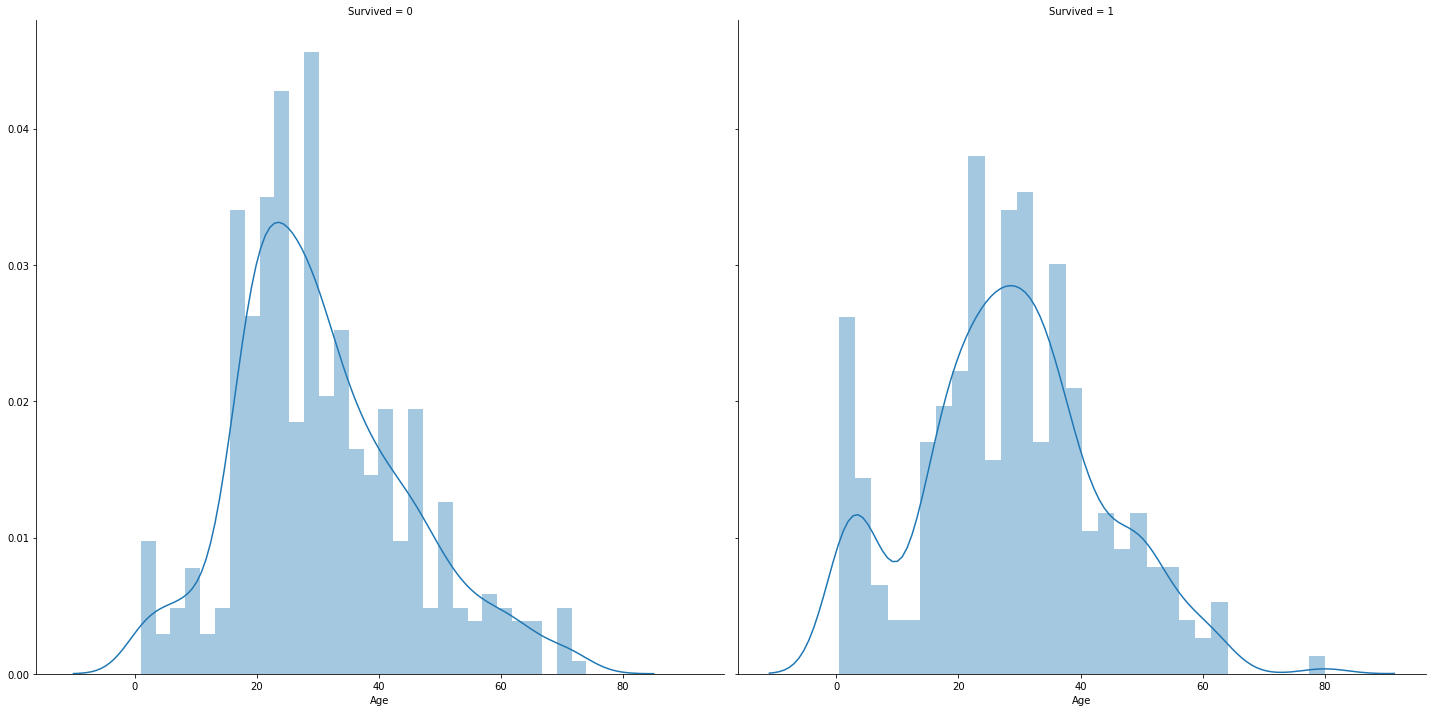

In [74]:
gr=sns.FacetGrid(data, col="Survived",size=10)
gr.map(sns.distplot, "Age", bins=30)
plt.show()

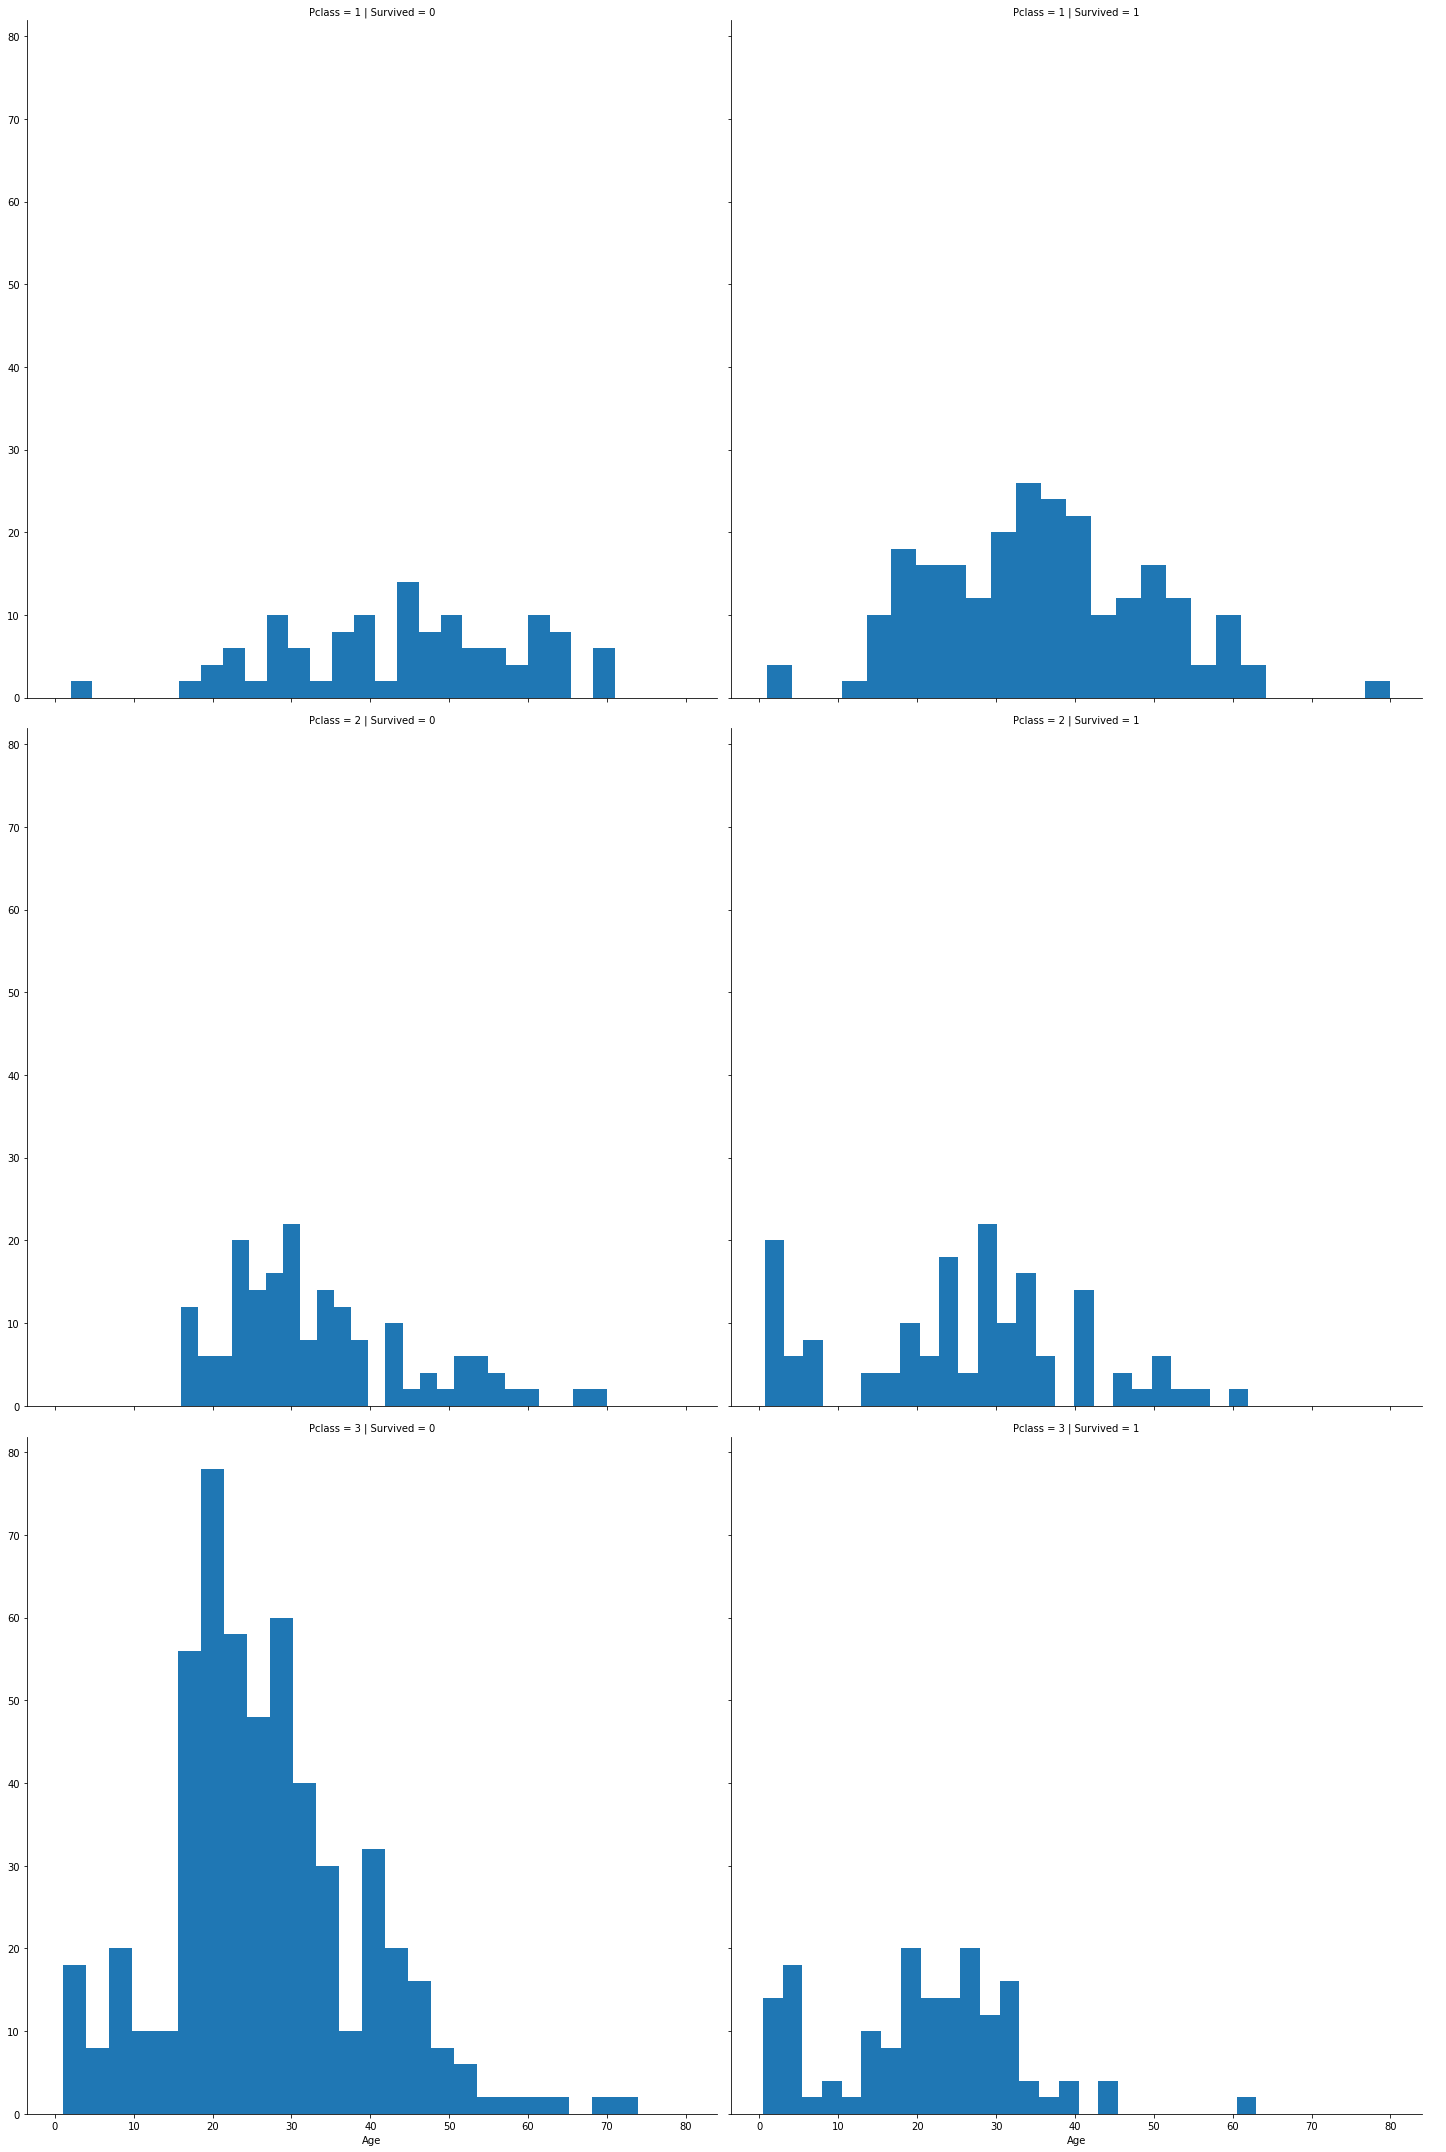

In [75]:
gr=sns.FacetGrid(data, col="Survived", row="Pclass", size=10)
gr.map(plt.hist, "Age", bins=25)
gr.add_legend()
plt.show()

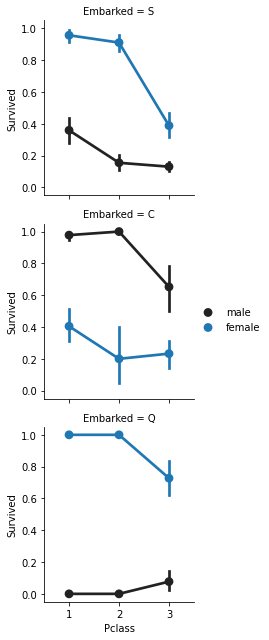

In [77]:
gr=sns.FacetGrid(data, row="Embarked", size=3)
gr.map(sns.pointplot, "Pclass", "Survived", "Sex")
gr.add_legend()
plt.show()

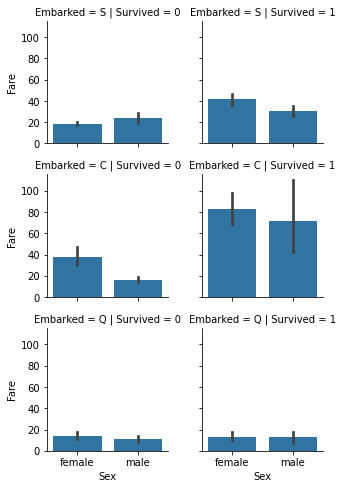

In [78]:
gr = sns.FacetGrid(data, row = "Embarked", col = "Survived", size=2.3)
gr.map(sns.barplot, "Sex", "Fare")
gr.add_legend()
plt.show()

In [80]:
data[data["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
28,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
30,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
31,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
35,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
41,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


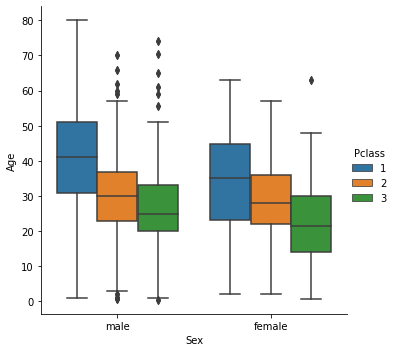

In [82]:
sns.factorplot(x="Sex", y="Age", hue="Pclass", data=data, kind="box")
plt.show()

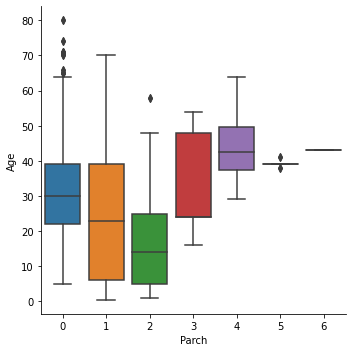

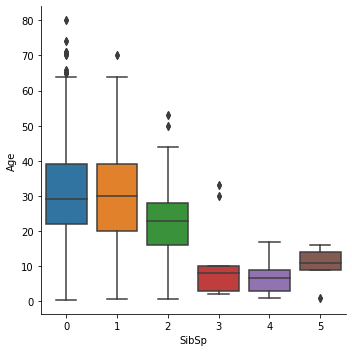

In [85]:
sns.factorplot(x="Parch", y="Age", data=data, kind="box")
sns.factorplot(x="SibSp", y="Age", data=data, kind="box")
plt.show()


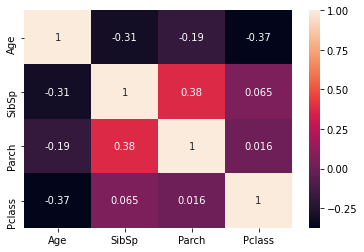

In [86]:
sns.heatmap(data[["Age","Sex", "SibSp", "Parch", "Pclass"]].corr(), annot=True)
plt.show()

Linear Regression

In [91]:
from sklearn import svm, tree, preprocessing, metrics, linear_model, svm
import sklearn.ensemble as ske
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [100]:
data.head(2)
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 12 columns):
PassengerId    1762 non-null int64
Survived       1762 non-null int64
Pclass         1762 non-null int64
Name           1762 non-null object
Sex            1762 non-null object
Age            1422 non-null float64
SibSp          1762 non-null int64
Parch          1762 non-null int64
Ticket         1762 non-null object
Fare           1762 non-null float64
Cabin          402 non-null object
Embarked       1762 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 165.3+ KB


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             340
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1360
Embarked          0
dtype: int64

In [102]:
data["Age"]=data["Age"].fillna(1)

In [103]:
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1360
Embarked          0
dtype: int64

In [104]:
X = data[['Pclass','Age','Fare']].values
Y = data['Survived'].values


In [105]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=5)

In [106]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
y_pred=regressor.predict(X_test)

In [108]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.40517623239464934
Mean Squared Error: 0.20172137934740061
Root Mean Squared Error: 0.44913403272007857


In [109]:
#Decision Trees
clf_dt = tree.DecisionTreeClassifier(max_depth=10)
clf_dt.fit(X_train, Y_train)
clf_dt.score(X_test, Y_test)

0.7844990548204159

In [114]:
df=pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})

In [115]:
df.head()

,Actual,Predicted
0,0,0.435764
1,0,0.232724
2,0,0.257195
3,0,0.253014
4,0,0.413135


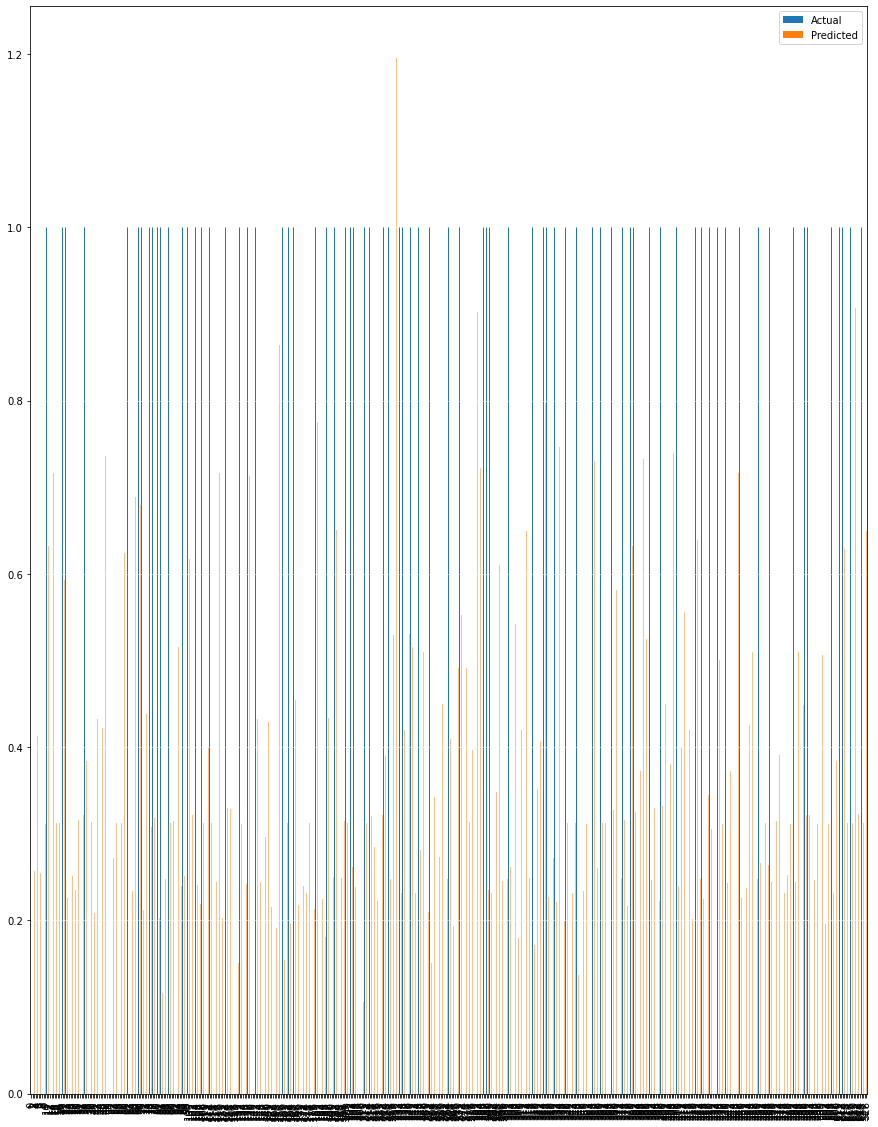

In [120]:
df.plot(kind='bar',figsize=(15,20))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='white')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
